In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\projects\machine learning\DataScience\Dataset\Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [3]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
#df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
#df.shape()

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

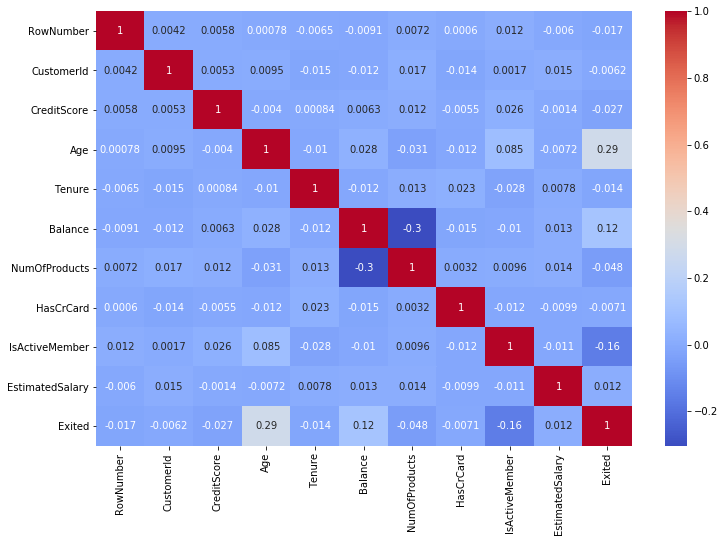

In [12]:
cor=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
#anova
nums=['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary']
xd=df[nums]
yd=df['Exited']
from sklearn.feature_selection import f_classif
fsc,p = f_classif(xd,yd)
for i in range(len(nums)):
    print(nums[i],p[i])

CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


In [15]:
#chi square
cats = ['Geography', 'Gender','HasCrCard', 'IsActiveMember']
xd = df[cats]
yd = df['Exited']
from sklearn.preprocessing import LabelEncoder 
xd['Geography'] = LabelEncoder().fit_transform(xd['Geography'])
xd['Gender'] = LabelEncoder().fit_transform(xd['Gender'])

from sklearn.feature_selection import chi2
fs,ps = chi2(xd,yd)
for i in range(len(cats)):
    print(cats[i],ps[i])


Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.5680362405434552e-27


d:\anaconda\envs\home\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\anaconda\envs\home\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [16]:
x = df[['CreditScore', 'Age','Balance','Geography', 'Gender', 'IsActiveMember','NumOfProducts']]
y = df['Exited']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

transformer = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[3,4])],remainder='passthrough')
transformer.fit(x)
x2 = transformer.transform(x)
print(x2.shape)

(10000, 8)


In [17]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.2,random_state=5)

In [32]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=5,criterion='gini')


In [33]:
model.fit(xtr,ytr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

# Performance Analysis

In [34]:
ypred = model.predict(xts)

In [35]:
from sklearn import metrics
metrics.accuracy_score(yts,ypred)

0.7855

In [36]:
metrics.recall_score(yts,ypred)

0.5111111111111111

In [37]:
metrics.precision_score(yts,ypred)

0.4726027397260274

In [38]:
metrics.f1_score(yts,ypred)

0.49110320284697506

In [39]:
ypredt = model.predict(xtr)
print("acc",metrics.accuracy_score(ytr,ypredt))
print("f1",metrics.f1_score(ytr,ypredt))#model overfitted

acc 0.99975
f1 0.9993868792152054


In [42]:
model2 = DecisionTreeClassifier(random_state=5,criterion='gini',max_depth=10,min_samples_leaf=15,min_samples_split=50)
model2.fit(xtr,ytr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [45]:
ypred2 = model2.predict(xts)
print("acc",metrics.accuracy_score(yts,ypred2))
print("f1",metrics.f1_score(yts,ypred2))

acc 0.8455
f1 0.5462555066079295


## Hyperparameter Tuning


In [46]:
params = {
    'max_depth':np.arange(3,50,1),
    'min_samples_leaf':np.arange(5,200,5),
    'min_samples_split':np.arange(10,200,10)
}
params

{'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 'min_samples_leaf': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
         70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
        135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195]),
 'min_samples_split': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190])}

In [47]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(DecisionTreeClassifier(random_state=5,criterion='gini'),
                     param_grid=params,scoring='f1',verbose=True,n_jobs=-1,cv=5)

In [48]:
search.fit(x2,y)

Fitting 5 folds for each of 34827 candidates, totalling 174135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1446 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 2846 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 4646 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 6846 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 9446 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 12446 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 15846 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 19646 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 23846 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 28446 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 33446 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 38846 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 44646 ta

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=5, splitter='best'),
             iid='depre...
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': array([  5,  10,  15,  20,  25,  30,  

In [49]:
search.best_score_

0.58840030332766

In [50]:
search.best_params_

{'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 100}

In [53]:
x.columns


Index(['CreditScore', 'Age', 'Balance', 'Geography', 'Gender',
       'IsActiveMember', 'NumOfProducts'],
      dtype='object')

In [54]:
model3 = DecisionTreeClassifier(random_state=5,criterion='gini',max_depth=11,min_samples_leaf=5,min_samples_split=100)
model3.fit(xtr,ytr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [52]:
from sklearn import tree
fnames= ['CreditScore', 'Age', 'Balance', 'Geo_germany','Geo_spain', 'Gender','IsActiveMember','NumOfProducts']
cnames = ['Not Exited','Exited']

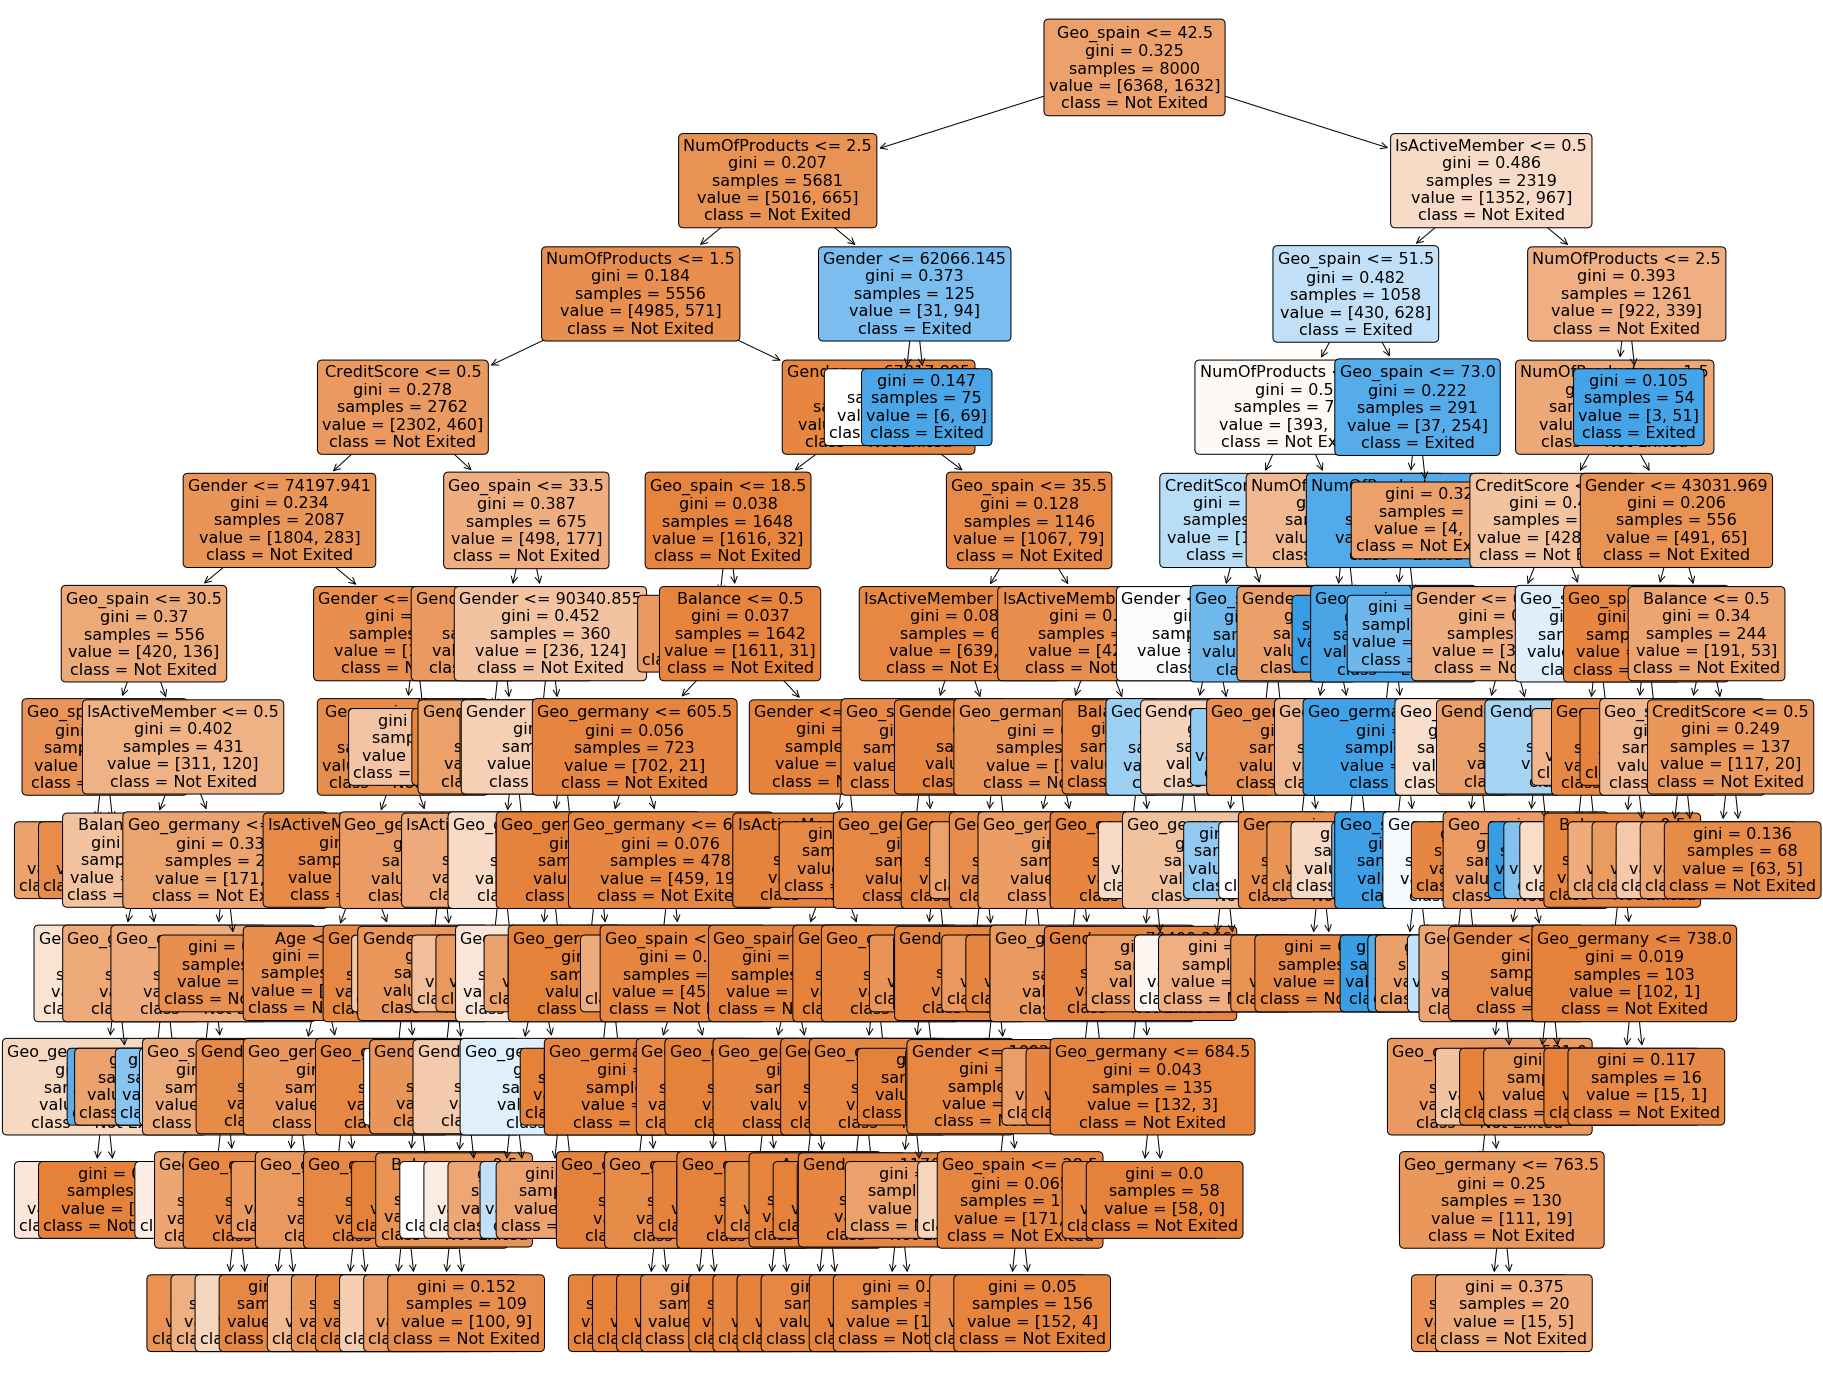

In [55]:
plt.figure(figsize=(30,25))
tree.plot_tree(model3,feature_names=fnames,class_names=cnames,rounded=True,filled=True,fontsize=16)
plt.show()

In [ ]:
import graphviz
graphdata = tree.export_graphviz(model3,feature_names=fnames,class_names=cnames,rounded=True,filled=True,fontsize=16)
graph = graphviz.source(graphdata)

In [58]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(model3,xtr,ytr,target_name='churn-Exited',feature_names=fnames,class_names=cnames)
viz

ModuleNotFoundError: No module named 'dtreeviz'